In [ ]:
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import transformers
from transformers import AutoModel, BertTokenizerFast
import seaborn as sns
import matplotlib.pyplot as plt
# specify GPU
device = torch.device("cuda")

In [ ]:
# import libarries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# library for train test split
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modeling
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D,  Flatten, Dense, Dropout, LSTM, SpatialDropout1D, Bidirectional,BatchNormalization

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving VUA_formatted.csv to VUA_formatted.csv


In [ ]:
fn = list(uploaded.keys())[0]
print(fn
    )

VUA_formatted.csv


In [ ]:
vua = pd.read_csv(fn)

In [ ]:
vua.head()

text_idx sentence_idx       verb  \
0  a1h-fragment06          117    reflect   
1  a1h-fragment06          118  encounter   
2  a1h-fragment06          118     bellow   
3  a1h-fragment06          118      break   
4  a1h-fragment06          118     design   

                                            sentence  verb_idx  label  
0  He was President of FISA ( Federation Internat...        31      1  
1  Most athletes first encountered him as a voice...         3      0  
2  Most athletes first encountered him as a voice...         9      1  
3  Most athletes first encountered him as a voice...        17      1  
4  Most athletes first encountered him as a voice...        21      1

In [ ]:
vua.drop(["text_idx","sentence_idx","verb", "verb_idx"], inplace=True, axis=1)

In [ ]:
vua.head()

sentence  label
0  He was President of FISA ( Federation Internat...      1
1  Most athletes first encountered him as a voice...      0
2  Most athletes first encountered him as a voice...      1
3  Most athletes first encountered him as a voice...      1
4  Most athletes first encountered him as a voice...      1

In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
df = vua
df.head()

sentence  label
0  He was President of FISA ( Federation Internat...      1
1  Most athletes first encountered him as a voice...      0
2  Most athletes first encountered him as a voice...      1
3  Most athletes first encountered him as a voice...      1
4  Most athletes first encountered him as a voice...      1

In [ ]:
df_np=df['sentence'].to_numpy()

In [ ]:
df_np

array(["He was President of FISA ( Federation Internationale des Societes d'Aviron ) , the world governing body , for 30 years ; and most of this body 's attitudes and practices reflect the force of his strict , but genial personality .",
       'Most athletes first encountered him as a voice , bellowing in multi-lingual fury at officials who had broken rules or arrangements designed to make racing safer or more fair .',
       'Most athletes first encountered him as a voice , bellowing in multi-lingual fury at officials who had broken rules or arrangements designed to make racing safer or more fair .',
       ...,
       'Aristotle said something very interesting in that extract from the Politics which I quoted earlier ; he said that women have a deliberative faculty but that it lacks full authority .',
       'Aristotle said something very interesting in that extract from the Politics which I quoted earlier ; he said that women have a deliberative faculty but that it lacks full autho

In [ ]:
df_enc = tokenizer.batch_encode_plus(df_np.tolist(),max_length = 30,padding='max_length',truncation=True)

In [ ]:
df_enc

{'input_ids': [[101, 2002, 2001, 2343, 1997, 27424, 2050, 1006, 4657, 21339, 4078, 18341, 2015, 1040, 1005, 20704, 9711, 2078, 1007, 1010, 1996, 2088, 8677, 2303, 1010, 2005, 2382, 2086, 1025, 102], [101, 2087, 7576, 2034, 8567, 2032, 2004, 1037, 2376, 1010, 4330, 14138, 1999, 4800, 1011, 17002, 8787, 8111, 2012, 4584, 2040, 2018, 3714, 3513, 2030, 7565, 2881, 2000, 2191, 102], [101, 2087, 7576, 2034, 8567, 2032, 2004, 1037, 2376, 1010, 4330, 14138, 1999, 4800, 1011, 17002, 8787, 8111, 2012, 4584, 2040, 2018, 3714, 3513, 2030, 7565, 2881, 2000, 2191, 102], [101, 2087, 7576, 2034, 8567, 2032, 2004, 1037, 2376, 1010, 4330, 14138, 1999, 4800, 1011, 17002, 8787, 8111, 2012, 4584, 2040, 2018, 3714, 3513, 2030, 7565, 2881, 2000, 2191, 102], [101, 2087, 7576, 2034, 8567, 2032, 2004, 1037, 2376, 1010, 4330, 14138, 1999, 4800, 1011, 17002, 8787, 8111, 2012, 4584, 2040, 2018, 3714, 3513, 2030, 7565, 2881, 2000, 2191, 102], [101, 2087, 7576, 2034, 8567, 2032, 2004, 1037, 2376, 1010, 4330, 14138, 

In [ ]:
vua_train_seq = torch.tensor(df_enc['input_ids'])
vua_train_mask = torch.tensor(df_enc['attention_mask'])
df_encodec=vua_train_seq + vua_train_mask

In [ ]:
df_encodec

tensor([[  102,  2003,  2002,  ...,  2087,  1026,   103],
        [  102,  2088,  7577,  ...,  2001,  2192,   103],
        [  102,  2088,  7577,  ...,  2001,  2192,   103],
        ...,
        [  102, 17485,  2057,  ...,  2022,  2009,   103],
        [  102, 17485,  2057,  ...,  2022,  2009,   103],
        [  102,  2055,  2107,  ...,     0,     0,     0]])

In [ ]:
df_encoded = pd.DataFrame(df_encodec.numpy())

In [ ]:
# Insert the original columns in the beginning of the encoded dataframe
df_encoded.insert(loc=0, column='sentence', value=df["sentence"])
df_encoded.insert(loc=0, column='label', value=df["label"])

In [ ]:
df_encoded

label                                           sentence    0      1  \
0          1  He was President of FISA ( Federation Internat...  102   2003   
1          0  Most athletes first encountered him as a voice...  102   2088   
2          1  Most athletes first encountered him as a voice...  102   2088   
3          1  Most athletes first encountered him as a voice...  102   2088   
4          1  Most athletes first encountered him as a voice...  102   2088   
...      ...                                                ...  ...    ...   
23108      1  Aristotle said something very interesting in t...  102  17485   
23109      0  Aristotle said something very interesting in t...  102  17485   
23110      1  Aristotle said something very interesting in t...  102  17485   
23111      0  Aristotle said something very interesting in t...  102  17485   
23112      0                                 What did he mean ?  102   2055   

          2     3     4      5     6     7  ...    20    21    22    23  \
0      2002  2344  1998  27425  2051  1007  ...  1997  2089  8678  2304   
1      7577  2035  8568   2033  2005  1038  ...  2041  2019  3715  3514   
2      7577  2035  8568   2033  2005  1038  ...  2041  2019  3715  3514   
3      7577  2035  8568   2033  2005  1038  ...  2041  2019  3715  3514   
4      7577  2035  8568   2033  2005  1038  ...  2041  2019  3715  3514   
...     ...   ...   ...    ...   ...   ...  ...   ...   ...   ...   ...   
23108  2057  2243  2201   5876  2000  2009  ...  2309  2032  1038  3973   
23109  2057  2243  2201   5876  2000  2009  ...  2309  2032  1038  3973   
23110  2057  2243  2201   5876  2000  2009  ...  2309  2032  1038  3973   
23111  2057  2243  2201   5876  2000  2009  ...  2309  2032  1038  3973   
23112  2107  2003  2813   1030   103     0  ...     0     0     0     0   

          24     25    26    27    28   29  
0       1011   2006  2383  2087  1026  103  
1       2031   7566  2882  2001  2192  103  
2       2031   7566  2882  2001  2192  103  
3       2031   7566  2882  2001  2192  103  
4       2031   7566  2882  2001  2192  103  
...      ...    ...   ...   ...   ...  ...  
23108  20756  18515  4514  2022  2009  103  
23109  20756  18515  4514  2022  2009  103  
23110  20756  18515  4514  2022  2009  103  
23111  20756  18515  4514  2022  2009  103  
23112      0      0     0     0     0    0  

[23113 rows x 32 columns]

In [ ]:
df_encoded.shape

(23113, 32)

In [ ]:
data = df_encoded

In [ ]:
data.head()

label                                           sentence    0     1     2  \
0      1  He was President of FISA ( Federation Internat...  102  2003  2002   
1      0  Most athletes first encountered him as a voice...  102  2088  7577   
2      1  Most athletes first encountered him as a voice...  102  2088  7577   
3      1  Most athletes first encountered him as a voice...  102  2088  7577   
4      1  Most athletes first encountered him as a voice...  102  2088  7577   

      3     4      5     6     7  ...    20    21    22    23    24    25  \
0  2344  1998  27425  2051  1007  ...  1997  2089  8678  2304  1011  2006   
1  2035  8568   2033  2005  1038  ...  2041  2019  3715  3514  2031  7566   
2  2035  8568   2033  2005  1038  ...  2041  2019  3715  3514  2031  7566   
3  2035  8568   2033  2005  1038  ...  2041  2019  3715  3514  2031  7566   
4  2035  8568   2033  2005  1038  ...  2041  2019  3715  3514  2031  7566   

     26    27    28   29  
0  2383  2087  1026  103  
1  2882  2001  2192  103  
2  2882  2001  2192  103  
3  2882  2001  2192  103  
4  2882  2001  2192  103  

[5 rows x 32 columns]

In [ ]:
X = data.drop(["label", "sentence"], axis=1)
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
X_val =None
y_val = None

In [ ]:
X_val=X_test.iloc[0:750,:].append(X_train.iloc[0:300,:], ignore_index=True, sort=False)

<ipython-input-28-652d383b92e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_val=X_test.iloc[0:750,:].append(X_train.iloc[0:300,:], ignore_index=True, sort=False)


In [ ]:
y_val = y_test.iloc[0:750].append(y_train.iloc[0:300], ignore_index=True)

<ipython-input-29-48720c6f401e>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_val = y_test.iloc[0:750].append(y_train.iloc[0:300], ignore_index=True)


Normal Neural Network

In [ ]:
model = Sequential()

model.add(Dense(1000, input_shape=(30,), activation="relu"))
model.add(BatchNormalization(axis=-1))

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Dense(10, activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              31000     
                                                                 
 batch_normalization (Batch  (None, 1000)              4000      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               256256    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6

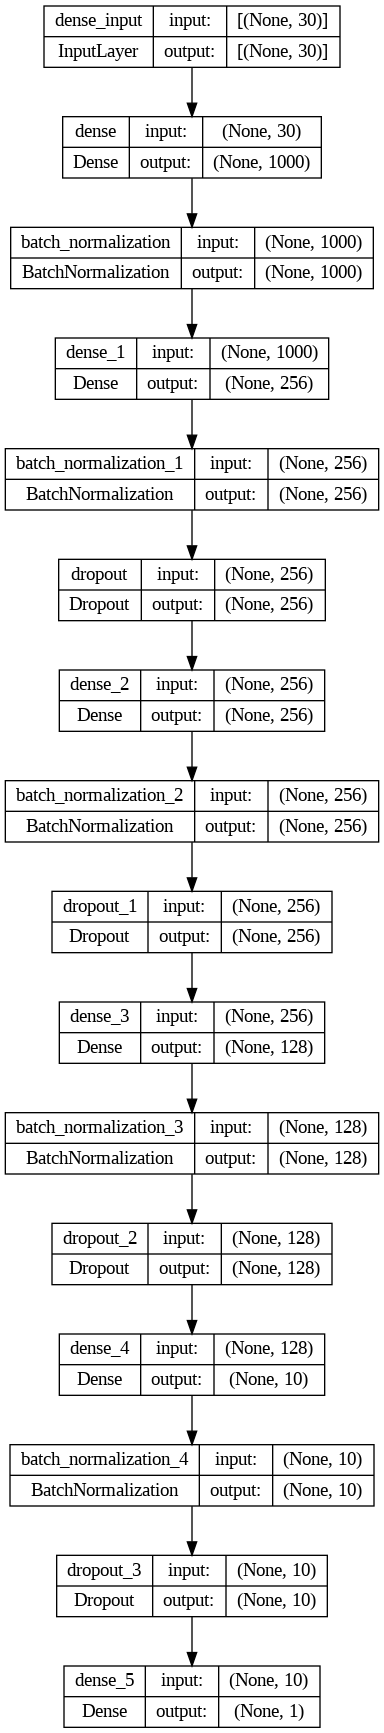

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
# defining the learning rate, the number of epochs and the batch size
INIT_LR = 0.001
NUM_EPOCHS = 30
BS = 64
opt = RMSprop(lr = INIT_LR)

In [ ]:
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Reduce the learning rate by half if validation accuracy has not increased in the last 3 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
fitted_network = model.fit(X_train, y_train, validation_split=0.2, batch_size=BS, epochs=NUM_EPOCHS, callbacks=[learning_rate_reduction])

Epoch 1/30
217/217 [==============================] - 12s 12ms/step - loss: 0.7108 - accuracy: 0.6152 - val_loss: 0.6189 - val_accuracy: 0.6738 - lr: 0.0010
Epoch 2/30
217/217 [==============================] - 3s 13ms/step - loss: 0.6166 - accuracy: 0.6909 - val_loss: 0.6003 - val_accuracy: 0.7006 - lr: 0.0010
Epoch 3/30
217/217 [==============================] - 2s 10ms/step - loss: 0.5956 - accuracy: 0.7066 - val_loss: 0.5975 - val_accuracy: 0.7035 - lr: 0.0010
Epoch 4/30
217/217 [==============================] - 2s 9ms/step - loss: 0.5868 - accuracy: 0.7135 - val_loss: 0.5952 - val_accuracy: 0.7003 - lr: 0.0010
Epoch 5/30
217/217 [==============================] - 2s 9ms/step - loss: 0.5830 - accuracy: 0.7138 - val_loss: 0.5977 - val_accuracy: 0.7035 - lr: 0.0010
Epoch 6/30
217/217 [==============================] - 2s 9ms/step - loss: 0.5780 - accuracy: 0.7172 - val_loss: 0.5955 - val_accuracy: 0.7018 - lr: 0.0010
Epoch 7/30
217/217 [==============================] - 2s 9ms/step 

181/181 [==============================] - 1s 3ms/step


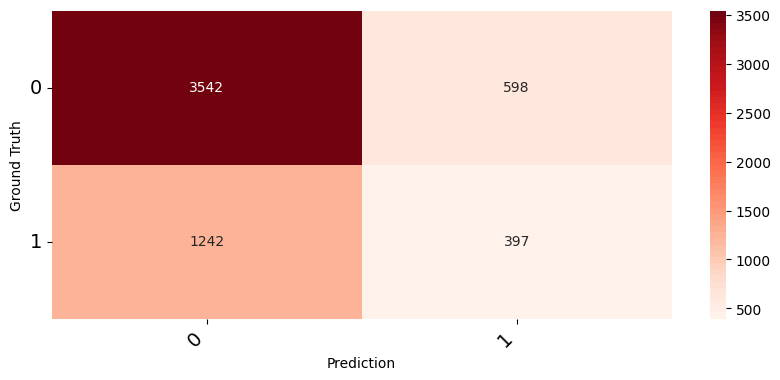

Accuray: 68.161%
ROC-AUC: 0.54889
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      4140
           1       0.40      0.24      0.30      1639

    accuracy                           0.68      5779
   macro avg       0.57      0.55      0.55      5779
weighted avg       0.64      0.68      0.65      5779



In [ ]:
# predict results
preds = np.round(model.predict(X_test)).flatten()

# Plot confusion matrix
plt.figure(figsize=(10,4))
heatmap = sns.heatmap(data = pd.DataFrame(confusion_matrix(y_test, preds)), annot = True, fmt = "d", cmap=sns.color_palette("Reds", 50))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show()

# Print accuracy, ROC and classification report for the test-set
print(f"""Accuray: {round(accuracy_score(y_test, preds), 5) * 100}%
ROC-AUC: {round(roc_auc_score(y_test, preds), 5)}""")
print(classification_report(y_test, preds))

In [ ]:
x = ["Teacher will kill me today"]

In [ ]:
xt = tokenizer.batch_encode_plus(x,max_length = 30,padding='max_length',truncation=True)

In [ ]:
vua_train_seq = torch.tensor(xt['input_ids'])
ua_train_mask = torch.tensor(xt['attention_mask'])
xf=vua_train_seq + vua_train_mask

In [ ]:
xtt= pd.DataFrame(xf.numpy())

In [ ]:
xx=xtt.to_numpy()

In [ ]:
xx

array([[ 102, 3837, 2098, ...,    1,    1,    1],
       [ 102, 3837, 2098, ...,    1,    1,    1],
       [ 102, 3837, 2098, ...,    1,    1,    1],
       ...,
       [ 102, 3837, 2098, ...,    1,    1,    1],
       [ 102, 3837, 2098, ...,    1,    1,    1],
       [ 102, 3837, 2098, ...,    0,    0,    0]])

In [ ]:
model.predict(xx)

723/723 [==============================] - 2s 2ms/step


array([[0.2204052],
       [0.2204052],
       [0.2204052],
       ...,
       [0.2204052],
       [0.2204052],
       [0.220648 ]], dtype=float32)

LSTM

In [ ]:
#LSTM layer arcitecture hyperparameters
n_lstm = 20
drop_lstm =0.5

In [ ]:
model1 = Sequential()
model1.add(Embedding(30000, 64, input_length=30))

model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Flatten())

model1.add(Dense(24, activation='relu'))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))

# model1.add(Dense(1, activation='softmax'))


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 64)            1920000   
                                                                 
 lstm (LSTM)                 (None, 30, 20)            6800      
                                                                 
 lstm_1 (LSTM)               (None, 30, 20)            3280      
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense_6 (Dense)             (None, 24)                14424     
                                                                 
 flatten_1 (Flatten)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

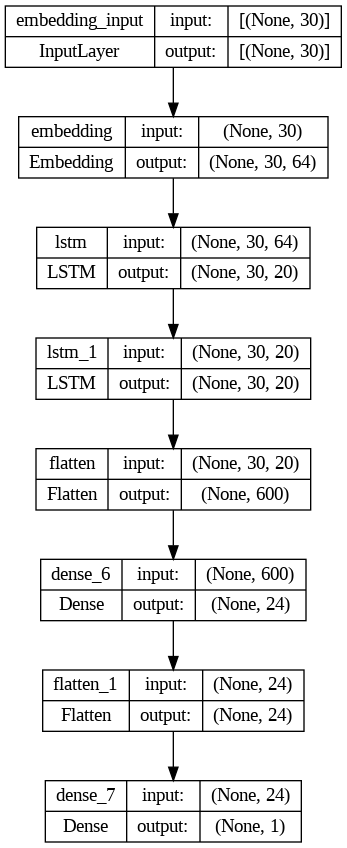

In [ ]:
plot_model(model1, show_shapes=True)

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 10
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model1.fit(X_train, y_train, epochs=num_epochs,
                    validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
542/542 - 34s - loss: 0.5607 - accuracy: 0.7181 - val_loss: 0.5384 - val_accuracy: 0.7278 - 34s/epoch - 63ms/step
Epoch 2/10
542/542 - 7s - loss: 0.4857 - accuracy: 0.7625 - val_loss: 0.5402 - val_accuracy: 0.7192 - 7s/epoch - 13ms/step
Epoch 3/10
542/542 - 7s - loss: 0.4427 - accuracy: 0.7872 - val_loss: 0.5691 - val_accuracy: 0.7185 - 7s/epoch - 12ms/step
Epoch 4/10
542/542 - 5s - loss: 0.4150 - accuracy: 0.7991 - val_loss: 0.6322 - val_accuracy: 0.7195 - 5s/epoch - 10ms/step
Epoch 5/10
542/542 - 5s - loss: 0.3927 - accuracy: 0.8063 - val_loss: 0.6393 - val_accuracy: 0.7091 - 5s/epoch - 10ms/step
Epoch 6/10
542/542 - 6s - loss: 0.3739 - accuracy: 0.8121 - val_loss: 0.6724 - val_accuracy: 0.7064 - 6s/epoch - 12ms/step
Epoch 7/10
542/542 - 5s - loss: 0.3597 - accuracy: 0.8167 - val_loss: 0.7520 - val_accuracy: 0.7031 - 5s/epoch - 9ms/step
Epoch 8/10
542/542 - 6s - loss: 0.3462 - accuracy: 0.8213 - val_loss: 0.7463 - val_accuracy: 0.7107 - 6s/epoch - 11ms/step
Epoch 9/10
542/

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history.history)

# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

181/181 [==============================] - 1s 4ms/step


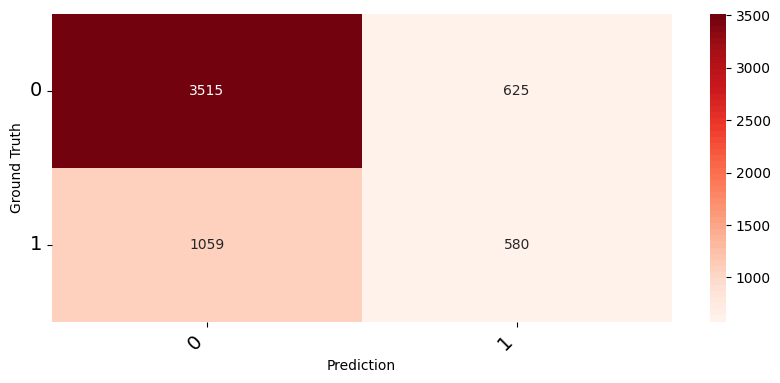

Accuray: 70.86%
ROC-AUC: 0.60145
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      4140
           1       0.48      0.35      0.41      1639

    accuracy                           0.71      5779
   macro avg       0.62      0.60      0.61      5779
weighted avg       0.69      0.71      0.69      5779



In [ ]:
# predict results
preds = np.round(model1.predict(X_test)).flatten()

# Plot confusion matrix
plt.figure(figsize=(10,4))
heatmap = sns.heatmap(data = pd.DataFrame(confusion_matrix(y_test, preds)), annot = True, fmt = "d", cmap=sns.color_palette("Reds", 50))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show()

# Print accuracy, ROC and classification report for the test-set
print(f"""Accuray: {round(accuracy_score(y_test, preds), 5) * 100}%
ROC-AUC: {round(roc_auc_score(y_test, preds), 5)}""")
print(classification_report(y_test, preds))

In [ ]:
x = ["what is your name"]

In [ ]:
xt = tokenizer.batch_encode_plus(x,max_length = 30,padding='max_length',truncation=True)


In [ ]:
vua_train_seq = torch.tensor(xt['input_ids'])
vua_train_mask = torch.tensor(xt['attention_mask'])
xf=vua_train_seq + vua_train_mask

In [ ]:
xtt= pd.DataFrame(xf.numpy())

In [ ]:
xx=xtt.to_numpy()

In [ ]:
xx

array([[ 102, 2055, 2004, 2116, 2172,  103,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0]])

In [ ]:
model1.predict(xx)

1/1 [==============================] - 0s 20ms/step


array([[0.30448747]], dtype=float32)

Bi-LSTM

In [ ]:
model2 = Sequential()
model2.add(Embedding(30000,64, input_length=30))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 10
early_stop = EarlyStopping(monitor='accuracy', patience=5)
history = model2.fit(X_train, y_train, epochs=num_epochs
                    ,callbacks =[early_stop], verbose=2)

Epoch 1/10
542/542 - 22s - loss: 0.5566 - accuracy: 0.7208 - 22s/epoch - 41ms/step
Epoch 2/10
542/542 - 5s - loss: 0.4771 - accuracy: 0.7671 - 5s/epoch - 10ms/step
Epoch 3/10
542/542 - 6s - loss: 0.4290 - accuracy: 0.7878 - 6s/epoch - 12ms/step
Epoch 4/10
542/542 - 5s - loss: 0.3976 - accuracy: 0.8031 - 5s/epoch - 8ms/step
Epoch 5/10
542/542 - 5s - loss: 0.3731 - accuracy: 0.8100 - 5s/epoch - 10ms/step
Epoch 6/10
542/542 - 4s - loss: 0.3578 - accuracy: 0.8168 - 4s/epoch - 8ms/step
Epoch 7/10
542/542 - 4s - loss: 0.3440 - accuracy: 0.8208 - 4s/epoch - 7ms/step
Epoch 8/10
542/542 - 4s - loss: 0.3296 - accuracy: 0.8247 - 4s/epoch - 7ms/step
Epoch 9/10
542/542 - 5s - loss: 0.3214 - accuracy: 0.8265 - 5s/epoch - 9ms/step
Epoch 10/10
542/542 - 4s - loss: 0.3115 - accuracy: 0.8317 - 4s/epoch - 7ms/step


33/33 [==============================] - 0s 3ms/step


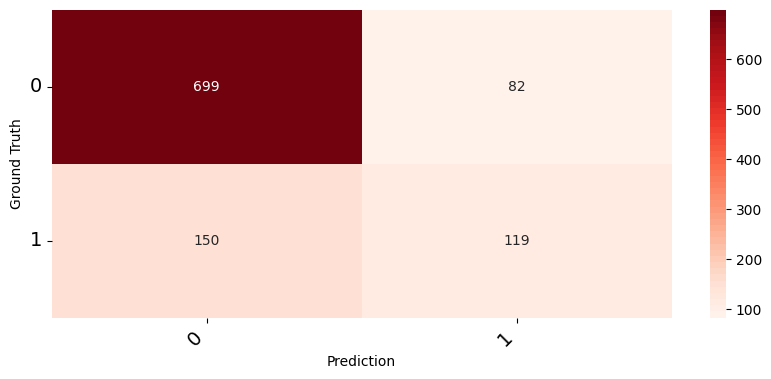

Accuray: 77.905%
ROC-AUC: 0.66869
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       781
           1       0.59      0.44      0.51       269

    accuracy                           0.78      1050
   macro avg       0.71      0.67      0.68      1050
weighted avg       0.76      0.78      0.77      1050



In [ ]:
# predict results
preds = np.round(model1.predict(X_val)).flatten()

# Plot confusion matrix
plt.figure(figsize=(10,4))
heatmap = sns.heatmap(data = pd.DataFrame(confusion_matrix(y_val, preds)), annot = True, fmt = "d", cmap=sns.color_palette("Reds", 50))
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show()

# Print accuracy, ROC and classification report for the test-set
print(f"""Accuray: {round(accuracy_score(y_val, preds), 5) * 100}%
ROC-AUC: {round(roc_auc_score(y_val, preds), 5)}""")
print(classification_report(y_val, preds))

In [ ]:
x = ["If I didn't do my homework, sir will kill me tomorrow."]

In [ ]:
xt = tokenizer.batch_encode_plus(x,max_length = 30,padding='max_length',truncation=True)


In [ ]:
vua_train_seq = torch.tensor(xt['input_ids'])
vua_train_mask = torch.tensor(xt['attention_mask'])
xf=vua_train_seq + vua_train_mask

In [ ]:
xtt= pd.DataFrame(xf.numpy())

In [ ]:
model2.predict(xtt)

1/1 [==============================] - 1s 680ms/step


array([[0.15730004]], dtype=float32)